In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# import scienceplots

# plt.style.use('science')

# plt.rcParams["xtick.minor.visible"] =  False
# plt.rcParams["ytick.minor.visible"] =  False
# plt.rcParams['legend.frameon'] = True

In [86]:
overall = catalog.load('overall_topics')
# overall['term'] = overall['term'].astype(str)
overall

[05/08/24 11:17:07] INFO     Loading data from 'overall_topics' (CSVDataset)...                 ]8;id=86747;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=760044;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

,term,weight,topic,model
0,auditory,0.036531,Topic 0,BERTopic
1,speech,0.033532,Topic 0,BERTopic
2,sound,0.029092,Topic 0,BERTopic
3,acoustic,0.011780,Topic 0,BERTopic
4,temporal,0.011425,Topic 0,BERTopic
...,...,...,...,...
174925,degrade,0.100000,Topic 9,LDA
174926,caps,0.100000,Topic 9,LDA
174927,irv,0.100000,Topic 9,LDA
174928,trs,0.100000,Topic 9,LDA


In [89]:
def get_top_n_topics(df, MAX_TOPICS = 10):
    topics = pd.unique(overall['topic'])
    return(topics[:MAX_TOPICS])


top_n_topics = get_top_n_topics(overall)
top_n_topics


array(['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5',
       'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9'], dtype=object)

In [4]:
def split_models(df):

    bert = df[df['model'] == 'BERTopic']
    lda =  df[df['model'] == 'LDA']

    return bert, lda

In [6]:
lda_top_all = lda[lda['topic'] == top_n_topics[0]]
lda_top_all

,term,weight,topic,model
1420,method,1007.183356,Topic 0,LDA
1421,imaging,1000.961817,Topic 0,LDA
1422,functional,974.865657,Topic 0,LDA
1423,resonance,948.036633,Topic 0,LDA
1424,magnetic,945.064193,Topic 0,LDA
...,...,...,...,...
18766,thorough,0.100000,Topic 0,LDA
18767,benchmarking,0.100000,Topic 0,LDA
18768,irv,0.100000,Topic 0,LDA
18769,trs,0.100000,Topic 0,LDA


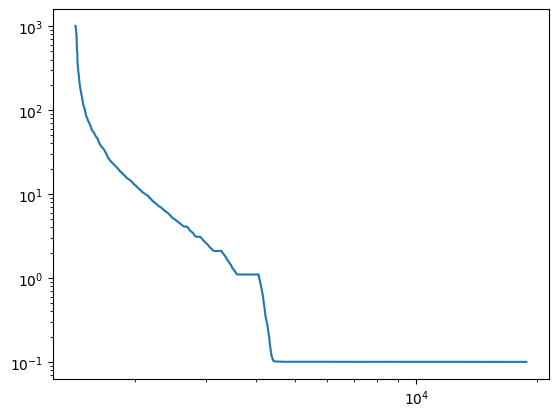

In [7]:
plt.plot(lda_top_all['weight'].sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')

In [79]:
bert_top = bert[bert['topic'] == top_n_topics[0]].sort_values('weight')
lda_top = lda[lda['topic'] == top_n_topics[0]].iloc[:10].sort_values('weight')

def filter_data(bert, lda, topic):

    bert_top = bert[bert['topic'] == topic].sort_values('weight')
    lda_top = lda[lda['topic'] == topic].iloc[:10].sort_values('weight')

    return bert_top, lda_top


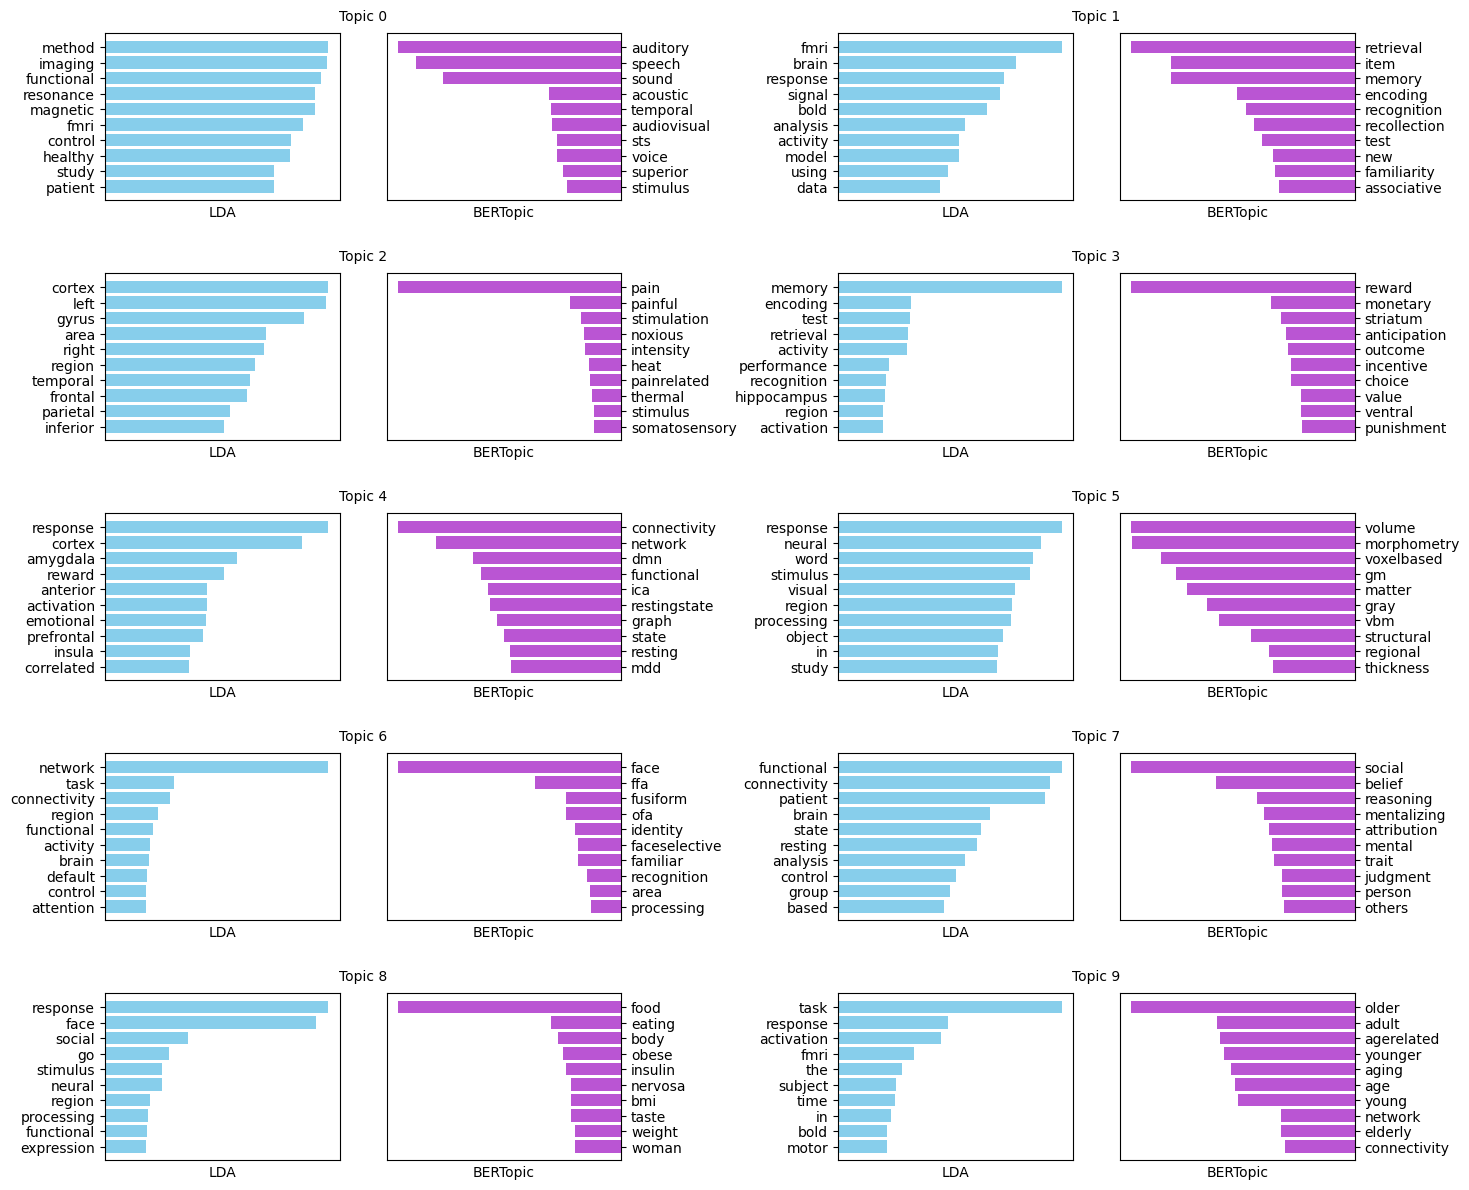

In [80]:
def produce_top_n_topics(bert, lda, top_n_topics):

    fig = plt.figure(figsize=(14, 12))
    subfigs = fig.subfigures(5, 2, hspace=0, wspace=0.1)

    for subfig, topic, in zip(subfigs.flat, top_n_topics):

        bert_top, lda_top = filter_data(bert, lda, topic)

        axs = subfig.subplot_mosaic([['top', 'top'], ['bottom_left', 'bottom_right']], gridspec_kw={'height_ratios': [0.05, 10]})

        ax = axs['top']
        ax.text(0.5, -0.1, topic, ha='center', va='center')
        ax.set_axis_off()

        ax = axs["bottom_left"]
        ax.barh(lda_top['term'], lda_top['weight'], color='skyblue')
        ax.set_xticks([])
        ax.set_xlabel('LDA')

        ax = axs["bottom_right"]
        ax.barh(bert_top['term'], bert_top['weight'] * -1, color='mediumorchid')
        ax.yaxis.tick_right()
        ax.set_xticks([])
        ax.set_xlabel('BERTopic')

produce_top_n_topics(bert, lda, top_n_topics)

In [76]:
topics_by_year = catalog.load('topics_by_year')
topics_by_year

[05/08/24 11:07:49] INFO     Loading data from 'topics_by_year' (CSVDataset)...                 ]8;id=877663;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=497292;file:///Users/tony/anaconda3/envs/pocs/lib/python3.8/site-packages/kedro/io/data_catalog.py#502\502]8;;\

,term,weight,topic,model,timepoint
0,word,0.092227,Topic 0,BERTopic,1997-2002
1,study,0.054374,Topic 0,BERTopic,1997-2002
2,semantic,0.050813,Topic 0,BERTopic,1997-2002
3,retrieval,0.050670,Topic 0,BERTopic,1997-2002
4,judgment,0.043554,Topic 0,BERTopic,1997-2002
...,...,...,...,...,...
349505,maxt,0.100000,Topic 9,LDA,2014-2018
349506,mh,0.100000,Topic 9,LDA,2014-2018
349507,intersession,0.100000,Topic 9,LDA,2014-2018
349508,fms,0.100000,Topic 9,LDA,2014-2018


In [78]:
def filter_timepoint(df, timepoint):
    
    bert = df[(df['model'] == 'BERTopic') & (df['timepoint'] == timepoint)]
    lda = df[(df['model'] == 'LDA') & (df['timepoint'] == timepoint)]

    return bert, lda

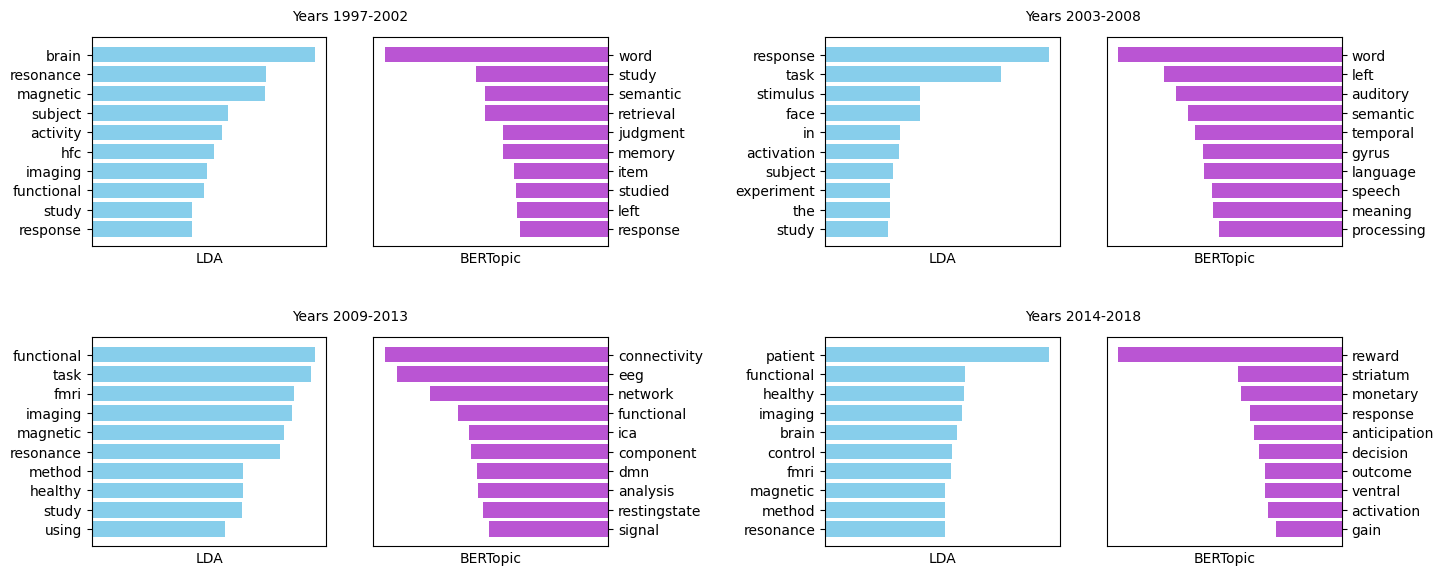

In [85]:
def produce_topics_by_year(df, topic='Topic 0'):

    fig = plt.figure(figsize=(14, 6))
    subfigs = fig.subfigures(2, 2, hspace=0, wspace=0.1)

    timepoints = pd.unique(df['timepoint'])

    for subfig, timepoint, in zip(subfigs.flat, timepoints):

        bert, lda = filter_timepoint(df, timepoint)
        bert_top, lda_top = filter_data(bert, lda, topic)

        axs = subfig.subplot_mosaic([['top', 'top'], ['bottom_left', 'bottom_right']], gridspec_kw={'height_ratios': [0.05, 10]})

        ax = axs['top']
        title = "Years " + timepoint
        ax.text(0.5, -0.1, title, ha='center', va='center')
        ax.set_axis_off()

        ax = axs["bottom_left"]
        ax.barh(lda_top['term'], lda_top['weight'], color='skyblue')
        ax.set_xticks([])
        ax.set_xlabel('LDA')

        ax = axs["bottom_right"]
        ax.barh(bert_top['term'], bert_top['weight'] * -1, color='mediumorchid')
        ax.yaxis.tick_right()
        ax.set_xticks([])
        ax.set_xlabel('BERTopic')

produce_topics_by_year(topics_by_year)

In [ ]:
def produce_appendix(df, top_n_topics):

    timepoints = pd.unique(df['timepoint'])

    for timepoint in timepoints:
        bert, lda = filter_timepoint(df, timepoint)
        produce_top_n_topics(bert, lda, top_n_topics)
        